In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#loading of the dataset
df = pd.read_csv('pca_results_with_ID.csv')
df.head()

,id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,SN0000001,-2.603402,0.652214,1.398145,-0.965454,1.881053,-0.167347,-0.298627,-0.236292,-1.250553,...,0.175553,0.013414,0.045945,0.495730,-0.399036,0.166671,0.815731,1.082312,0.218273,-0.633004
1,SN0000002,-2.793127,4.084719,-3.074626,-3.820904,-0.923625,0.142791,0.643950,-0.067573,-0.687369,...,-0.191318,-0.103779,-0.384863,0.174167,0.334349,0.435338,0.760717,-0.325207,-0.142979,0.276741
2,SN0000003,1.038838,-1.659183,2.402881,0.509974,3.095452,1.414909,-1.871599,-2.663950,0.779027,...,0.010005,0.183126,0.204934,-0.227715,0.467408,-0.110628,-0.426164,-0.745706,0.336807,-0.203150
3,SN0000004,-0.285234,-3.241281,4.033317,0.238018,-1.082585,1.347637,2.076591,2.227411,-3.124776,...,-0.516868,0.041360,0.377736,-0.008278,-0.343783,0.269332,0.238506,0.072756,0.591332,0.309780
4,SN0000005,-3.447541,1.259705,-1.392635,0.949497,0.095406,0.733245,-1.982322,-1.948838,0.158795,...,0.036051,-0.172852,-0.062465,0.688181,-2.247686,-0.177062,2.043092,-0.508176,0.931561,0.682002


In [3]:
#removing of non numerical columns
X = df.drop(columns=['id'])

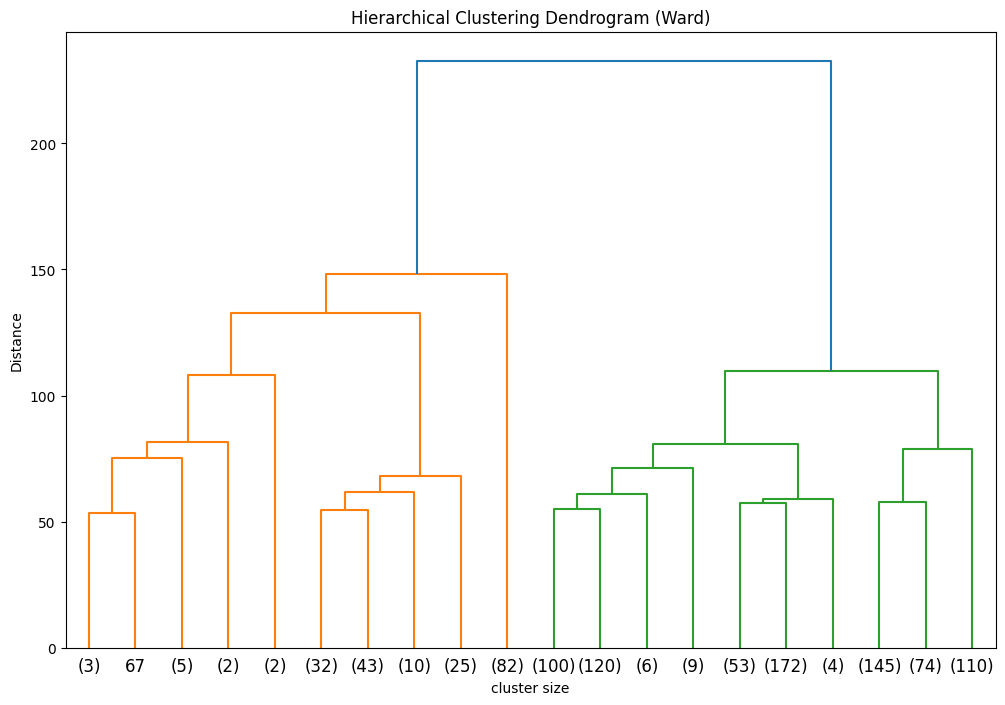

In [4]:
# Calculate the linkage matrix
linked = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=20)  # show only the last 20 merges
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size')
plt.ylabel('Distance')
plt.show()
#plt.savefig('last_20_dendrogram.png')

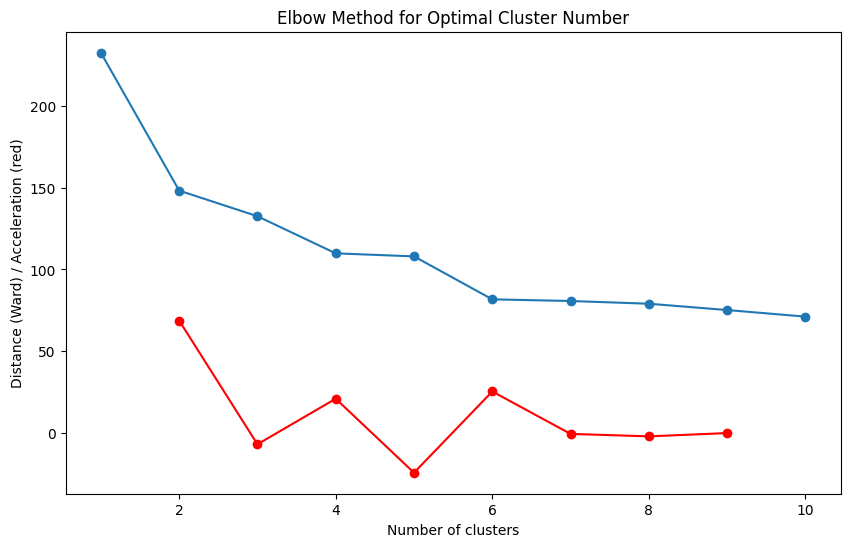

In [5]:
# Calculate distances for each possible number of clusters
#elbow method

last = linked[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(10, 6))
plt.plot(idxs, last_rev, marker='o')

# Calculate acceleration (second derivative)
acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idxs[:-2] + 1, acc_rev, marker='o', color='red')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Distance (Ward) / Acceleration (red)')
plt.show()
#plt.savefig('elbow_method.png')

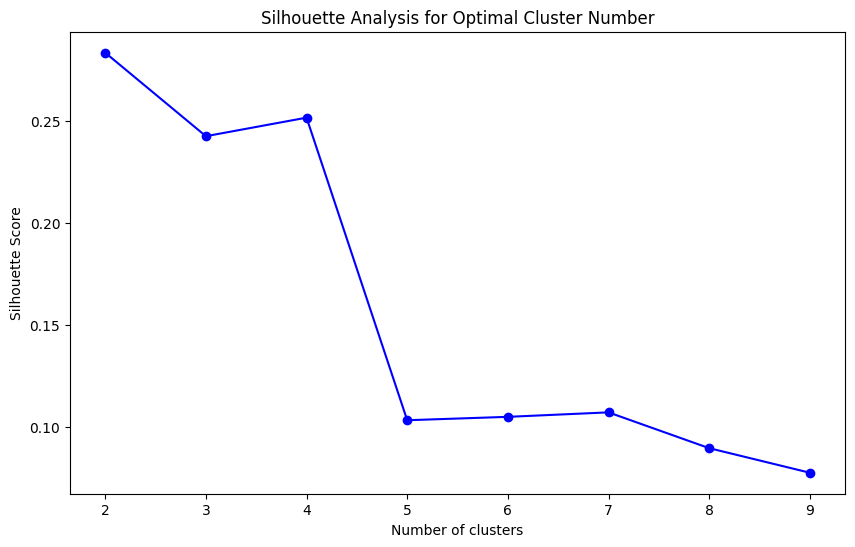

In [6]:
#sihoutte analysis
# Try different numbers of clusters
range_n_clusters = range(2, 10)
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Create clusters
    clusters = fcluster(linked, num_clusters, criterion='maxclust')
    
    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(X, clusters))

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Cluster Number')
plt.show()
#plt.savefig('silhoette.png')

In [7]:
#final clustering
#choosing the optimal number of clusters
# Create final clusters
optimal_clusters = 6
df['cluster'] = fcluster(linked, optimal_clusters, criterion='maxclust')


In [10]:
df.to_csv("hier_clust_pca_data.csv", index=False)

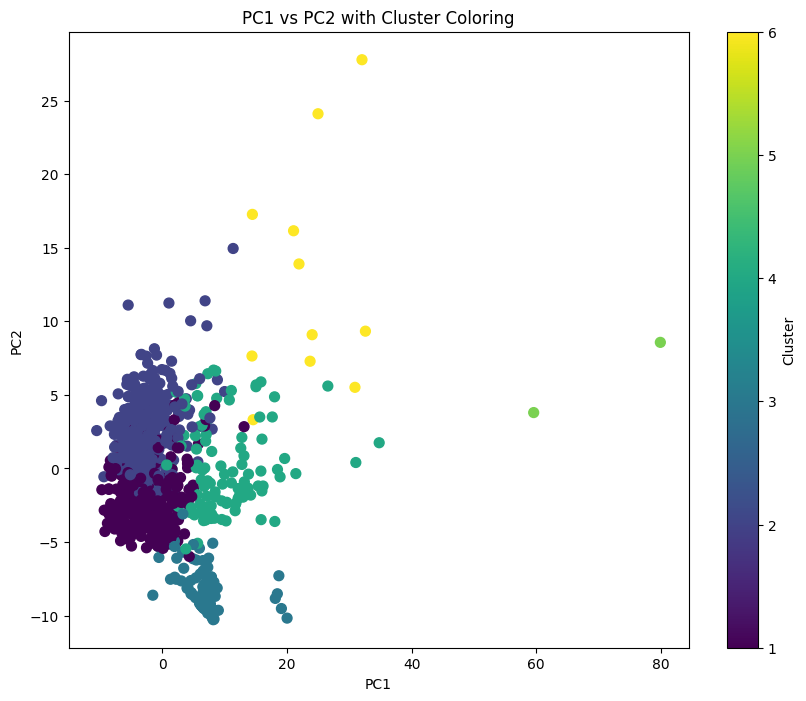

In [8]:
#2d visualizations
plt.figure(figsize=(10, 8))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster'], cmap='viridis', s=50)
plt.title('PC1 vs PC2 with Cluster Coloring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
#plt.savefig('pc1vrspc2.png')

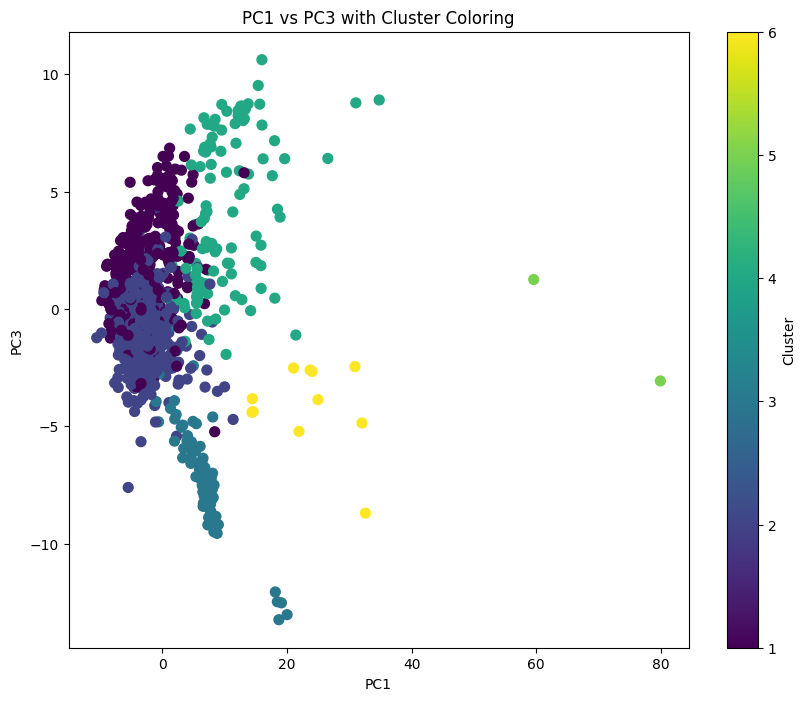

In [9]:
# PC1 vs PC3
# PC1 vs PC3
plt.figure(figsize=(10, 8))
plt.scatter(df['PC1'], df['PC3'], c=df['cluster'], cmap='viridis', s=50)
plt.title('PC1 vs PC3 with Cluster Coloring')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.colorbar(label='Cluster')
plt.show()
#plt.savefig('pc1vpc3.png')

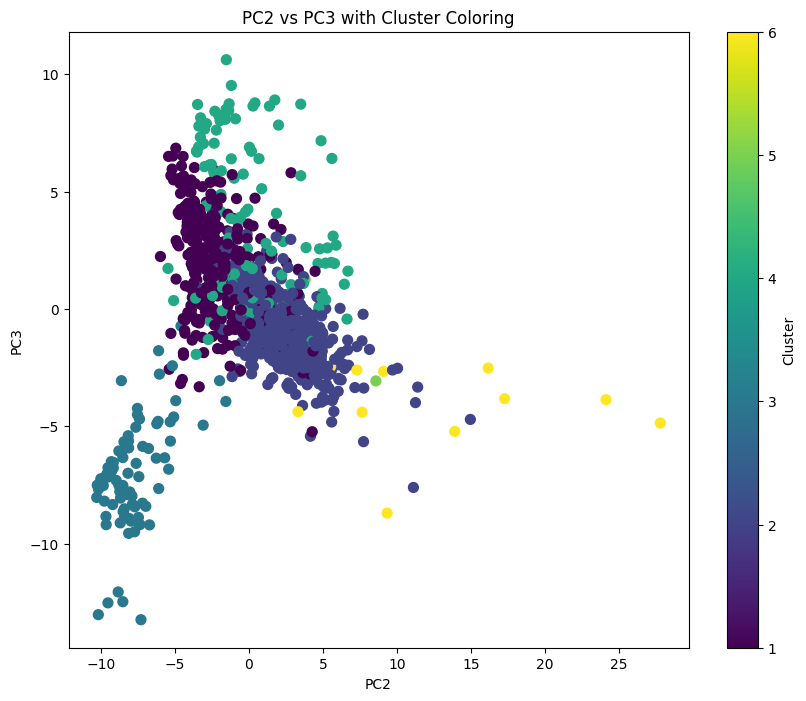

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(df['PC2'], df['PC3'], c=df['cluster'], cmap='viridis', s=50)
plt.title('PC2 vs PC3 with Cluster Coloring')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.colorbar(label='Cluster')
#plt.show()
plt.savefig('pc2vpv3.png')

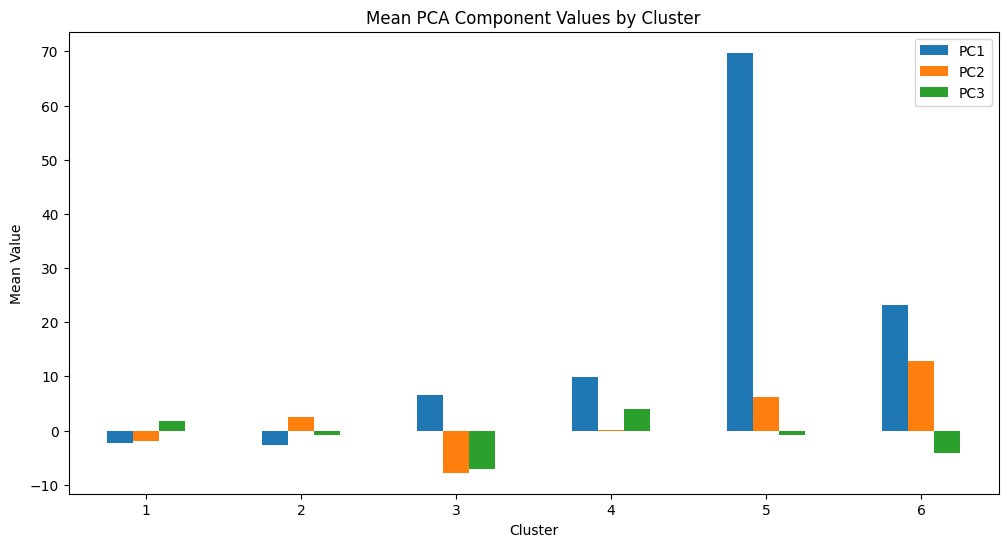

In [ ]:
#cluster profiles
# Calculate mean values for each cluster
cluster_profiles = df.groupby('cluster')[['PC1', 'PC2', 'PC3']].mean()

# Plot cluster profiles
cluster_profiles.plot(kind='bar', figsize=(12, 6))
plt.title('Mean PCA Component Values by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()
#plt.savefig('cluster profiles.png')

In [10]:
#visualizing the number of compounds
# Count the number of elements in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

C:\Users\KOJO KORANTENG\AppData\Local\Temp\ipykernel_12412\1146250768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


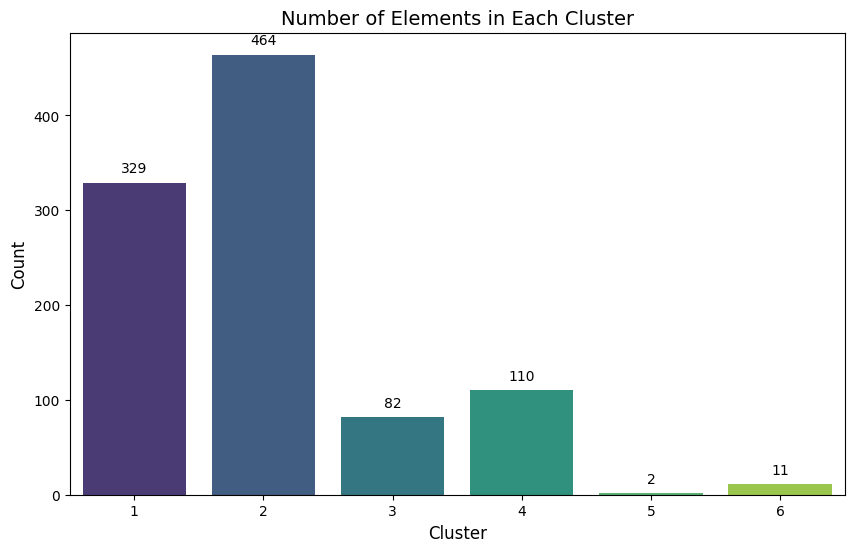

In [11]:
# Create the bar plot
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Add labels and title
plt.title('Number of Elements in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
# Adjust x-axis to show all cluster labels
plt.xticks(ticks=range(len(cluster_counts)), labels=cluster_counts.index)

plt.show()


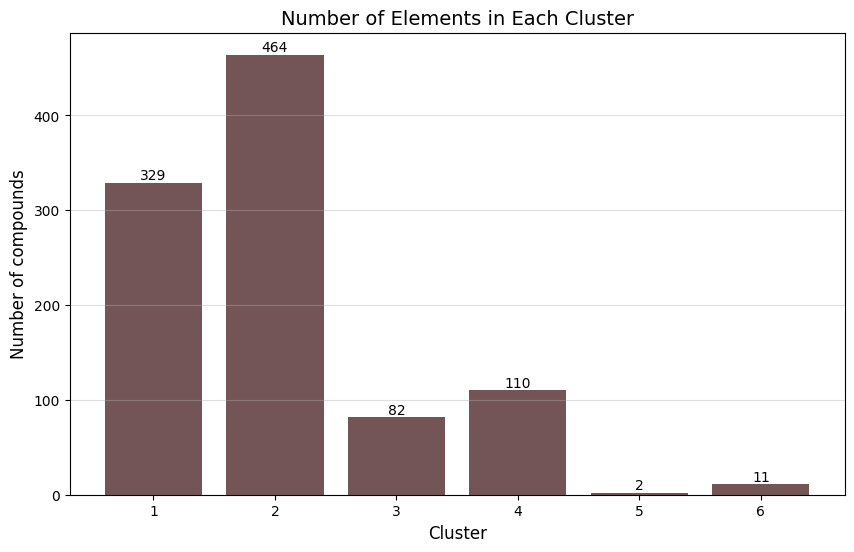

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='#735557')

# Customize the plot
plt.title('Number of Elements in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of compounds', fontsize=12)
plt.xticks(cluster_counts.index)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.4)
plt.show()
#plt.savefig('distro.png')

In [12]:
#performing cluster evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Extract features (PCA columns) and cluster labels
y = df[[col for col in df.columns if col.startswith("PC")]]
labels = df['cluster']

# Compute evaluation metrics
silhouette = silhouette_score(y, labels)
davies_bouldin = davies_bouldin_score(y, labels)
calinski_harabasz = calinski_harabasz_score(y, labels)

silhouette, davies_bouldin, calinski_harabasz


(0.1051327333988674, 1.96655373909228, 99.17303839315078)